In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('../datasets/weight-height.csv')

In [4]:
df.head(5)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
# list empty values count
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

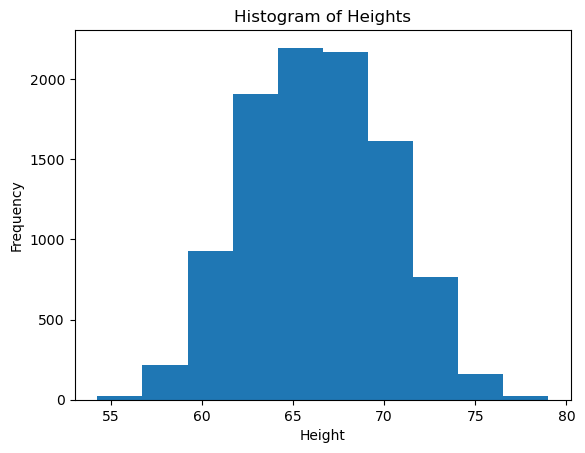

In [8]:
# check if data from one column is normally distributed
height = df['Height']
plt.hist(height, bins=10)
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.title('Histogram of Heights')
plt.show()
# data is normally distributed

In [10]:
# Label Encode Data
# Build sexcode column to encode string value of the column
label_encoder = preprocessing.LabelEncoder()

df['SexCode'] = label_encoder.fit_transform(df['Gender'])

In [12]:
# Dump the last lines of the dataset
df.tail(5)

,Gender,Height,Weight,SexCode
9995,Female,66.172652,136.777454,0
9996,Female,67.067155,170.867906,0
9997,Female,63.867992,128.475319,0
9998,Female,69.034243,163.852461,0
9999,Female,61.944246,113.649103,0


In [13]:
# Get attributes columsn for training and the target class
# The SexCode column is the target class
x = df.iloc[:,1:3].values
y = df.iloc[:,3]

In [16]:
# Split the dataset into training and test data
# The test_size=0.25 says that 25% of the dataset will be used for evaluating
# the model accuracy
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [18]:
# Instanciating the models
svm_model = SVC(gamma='auto')
lg_model = LogisticRegression()

In [19]:
# Traning models on the data with the fit function
svm_model.fit(x_train,y_train)
lg_model.fit(x_train,y_train)

LogisticRegression()

In [20]:
# Predicting the test data and trying to get the target class value right
svm_prediction = svm_model.predict(x_test)
lg_prediction = lg_model.predict(x_test)

In [21]:
# Evaluates the accuracy of the model, how much can it get right
svm_result = accuracy_score(y_test, svm_prediction)
lg_result = accuracy_score(y_test, lg_prediction)

In [22]:
# Print results accuracy of each model
print("svm :"+str(svm_result))
print("lg :"+str(lg_result))

svm :0.918
lg :0.9184
